다음 데이터 세트를 이용하여 다이아몬드 가격예측(회귀) 

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url) 

1. ML (RF, DT, LR) 수행

2. Dense layer만 이용 FNCC 구현

3. 순환 데이터 변환후 CNN 구현



각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv", index_col=0)

In [5]:
df

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df.columns

Index(['cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [8]:
X = df.drop('price',axis=1)
X.head()

,cut,color,clarity,depth,table,x,y,z
carat,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [9]:
y = df['price']
y.head()

carat
0.23    326
0.21    326
0.23    327
0.29    334
0.31    335
Name: price, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43152, 8) (43152,)
(10788, 8) (10788,)


NameError: name 'ly_preds' is not defined

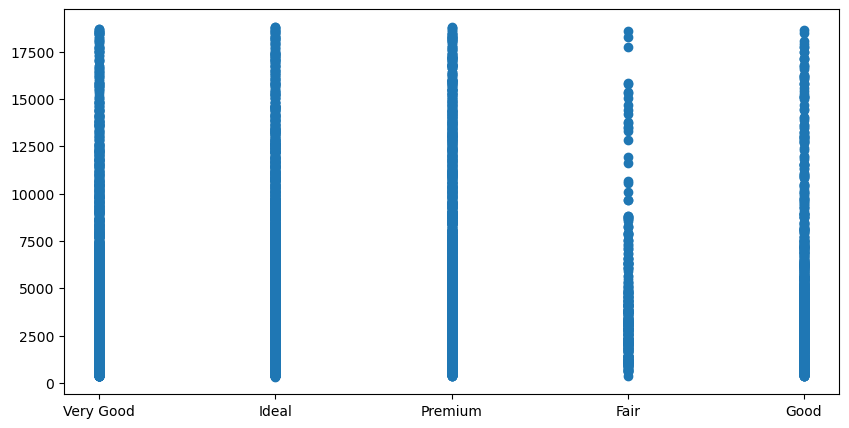

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['cut'], y_test, label='y_test')
plt.scatter(X_test['cut'], ly_preds, c='y', label='price')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

Text(0.5, 1.0, 'cut')

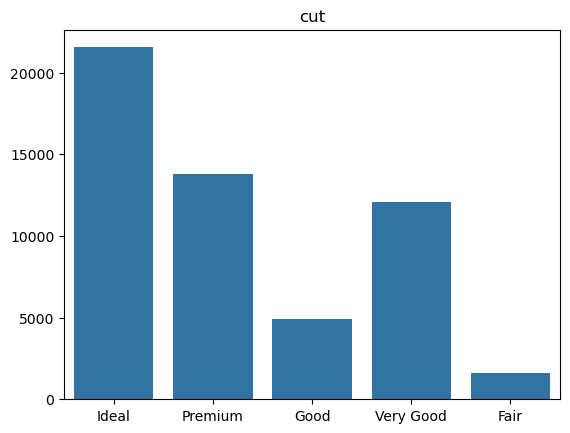

In [21]:
sns.countplot(data = df, x="cut")
plt.xlabel("")
plt.ylabel("")
plt.title("cut")

In [23]:
df['price'].value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [25]:
df.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
df = df.dropna()
df.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: xlabel='price', ylabel='Density'>

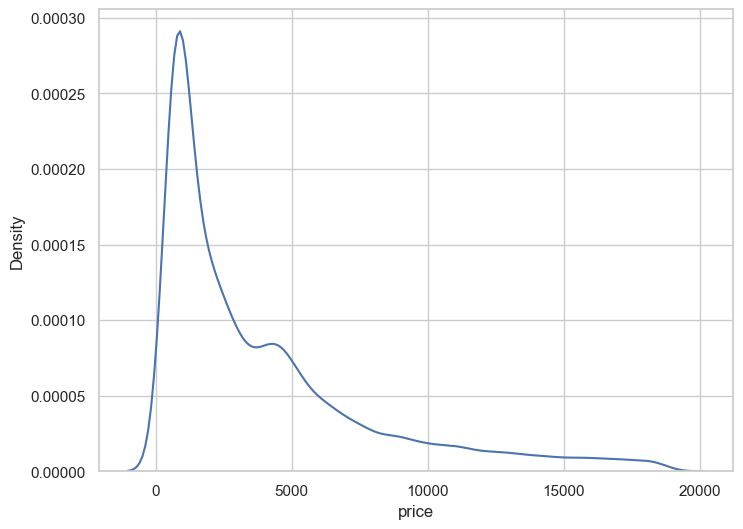

In [55]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['price'], kde = True, hist = False, ax=ax1)


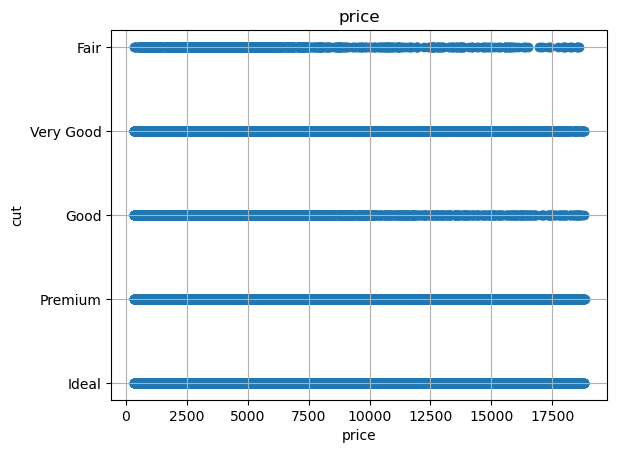

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# 산점도 그리기
plt.scatter(df['price'], df['cut'])
plt.xlabel('price')
plt.ylabel('cut')
plt.title('price')
plt.grid(True)
plt.show()

C:\Users\rlfrn\AppData\Local\Temp\ipykernel_55328\2864596649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price", data=df, palette="Set3")


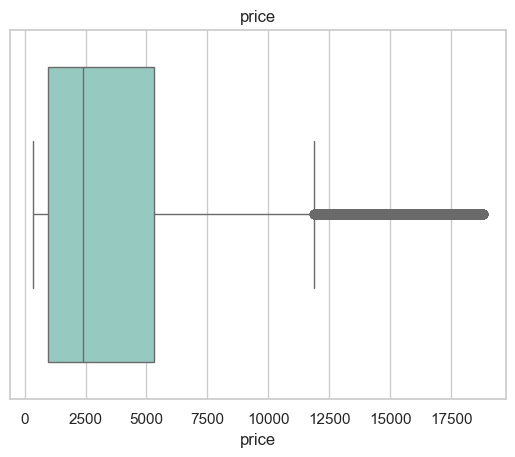

In [33]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="price", data=df, palette="Set3")
plt.title("price")
plt.show()

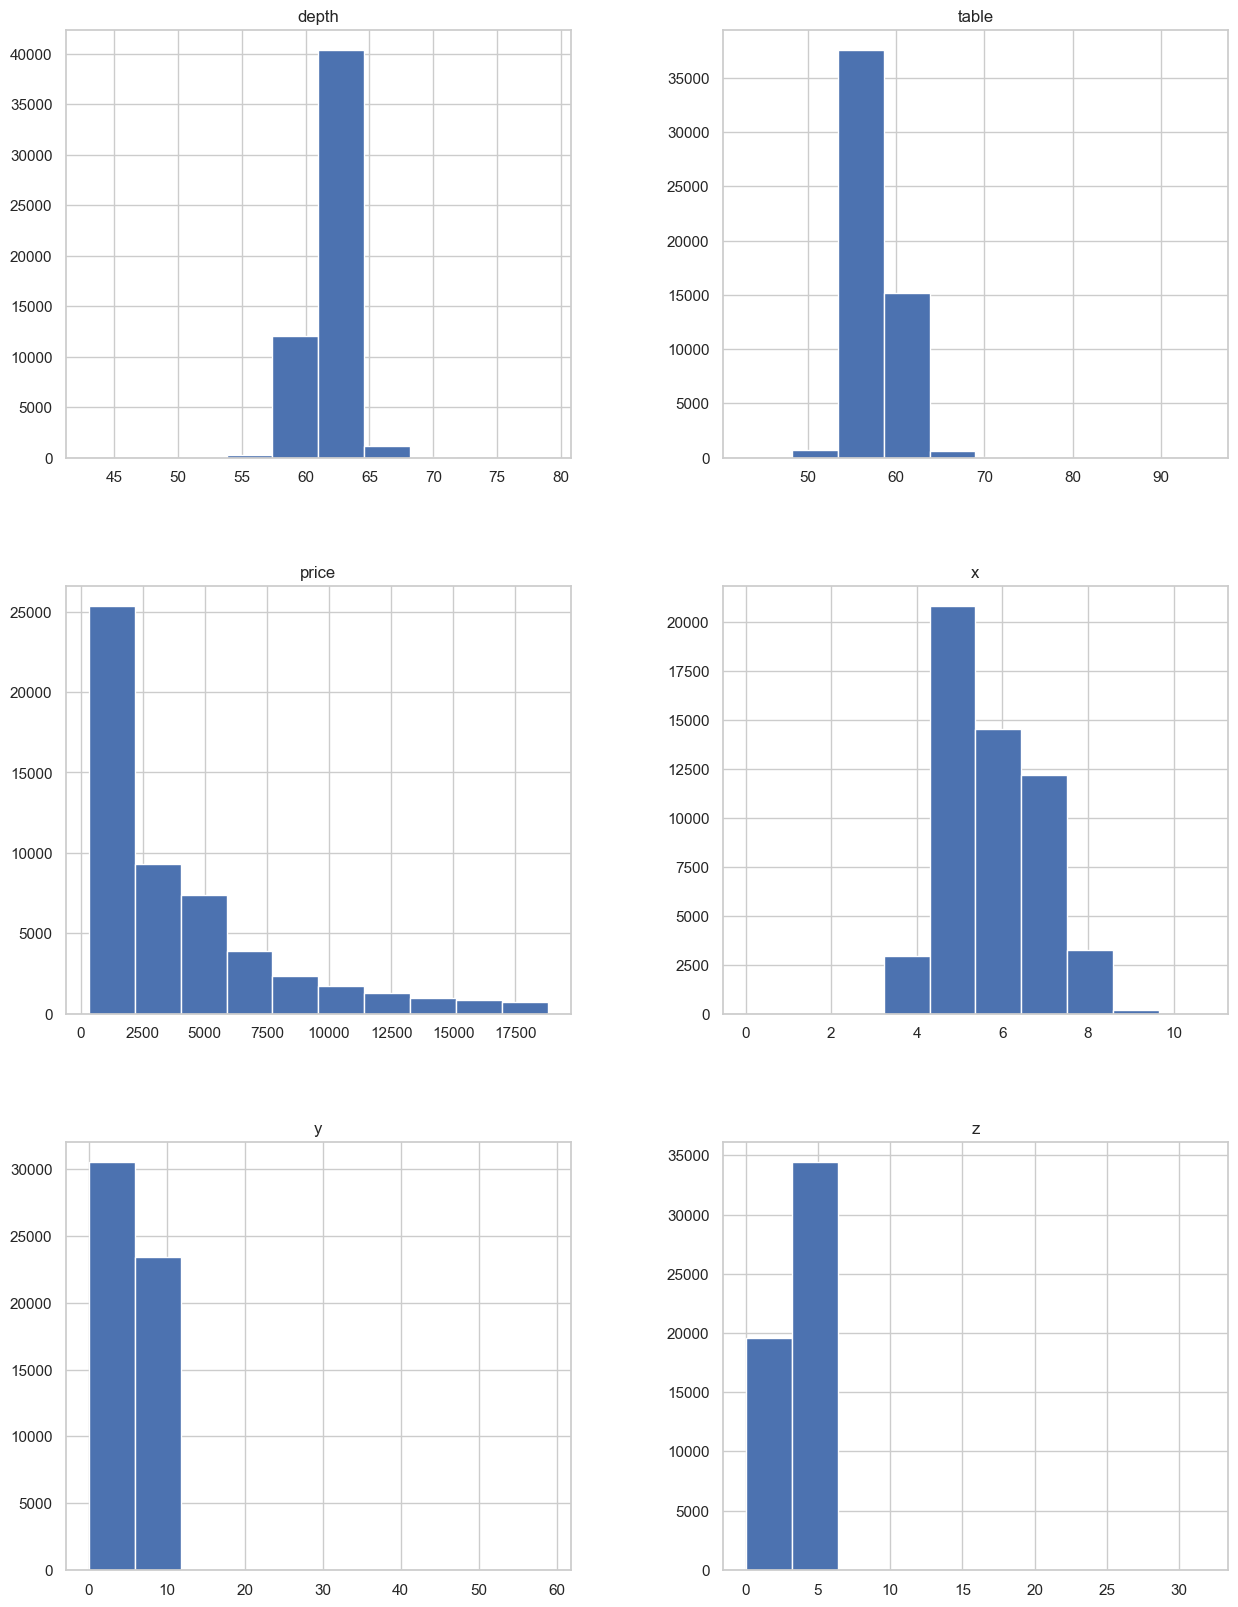

In [57]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [59]:
x = df.drop('price', axis =1)
x.head()

,cut,color,clarity,depth,table,x,y,z
carat,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [37]:
y = df['price']
y.value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [63]:
x = df.drop('price',axis=1)
x.head()

,cut,color,clarity,depth,table,x,y,z
carat,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [67]:
y = df['price']
y.head()

carat
0.23    326
0.21    326
0.23    327
0.29    334
0.31    335
Name: price, dtype: int64

LR

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

RF

In [49]:
df

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43152, 8) (43152,)
(10788, 8) (10788,)


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [103]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, Y_train)

pred_svm = clf_svm.predict(X_test)
print("\n- SVM -")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

ValueError: could not convert string to float: 'Ideal'

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

ValueError: could not convert string to float: 'Premium'

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print ("\n- RF -")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, Y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


- RF -


ValueError: could not convert string to float: 'Premium'

In [105]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, Y_train)
pred_lr=clf_lr.predict(X_test)
print ("\n -LR-")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

ValueError: could not convert string to float: 'Ideal'